In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
x, y = load_digits(return_X_y=True)

In [3]:
x[1].reshape(8,8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

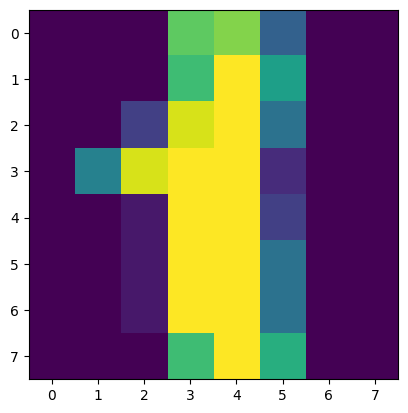

In [4]:
plt.imshow(x[1].reshape(8,8), interpolation='nearest')
plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
# Standardizing data 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [7]:
model = LogisticRegression(solver='saga', C=10, multi_class='multinomial',
                           random_state=0, max_iter=2000).fit(x_train, y_train)

In [8]:
x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)

In [9]:
model.score(x_train, y_train)

1.0

In [10]:
model.score(x_test, y_test)

0.9611111111111111

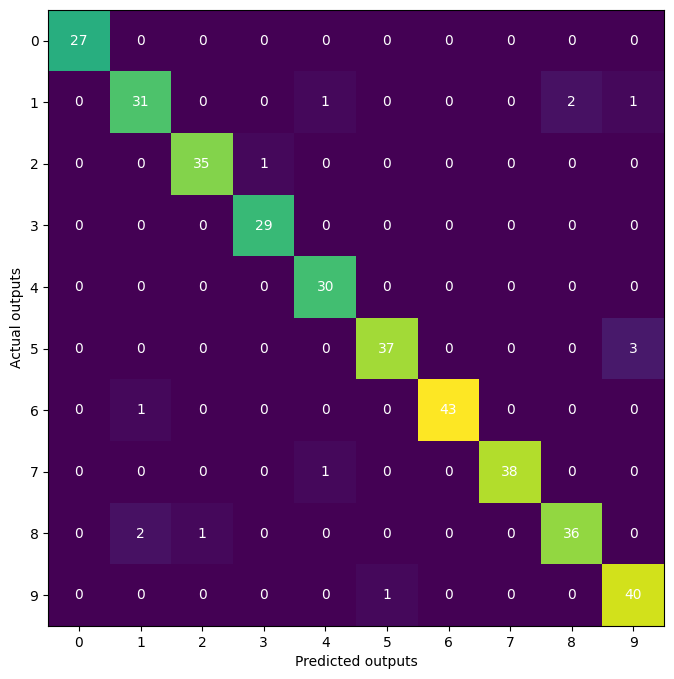

In [11]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.94      1.00      0.97        30
           5       0.97      0.93      0.95        40
           6       1.00      0.98      0.99        44
           7       1.00      0.97      0.99        39
           8       0.95      0.92      0.94        39
           9       0.91      0.98      0.94        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

